# Experimentation
* Data 2000

In [ ]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import KFold
%matplotlib inline
%run -i ../../tools/predict_functions.py
%run -i ../../tools/label_encoder.py

____

In [3]:
data_2000 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', delimiter=';')

Sort by column and split the Data into X and Y

In [23]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = data_2000.columns.difference(y_list)
S_data = data_2000.sort_values(by='PUNT_BIOLOGIA')
X = S_data.filter(items = X_list)
Y = S_data.filter(items = y_list)

# BIOLOGY
#### Try with KFOLD = 5
Create the Kfold, the Linear Model and make the predictions and the plots

Mean Score: 5.10118488268


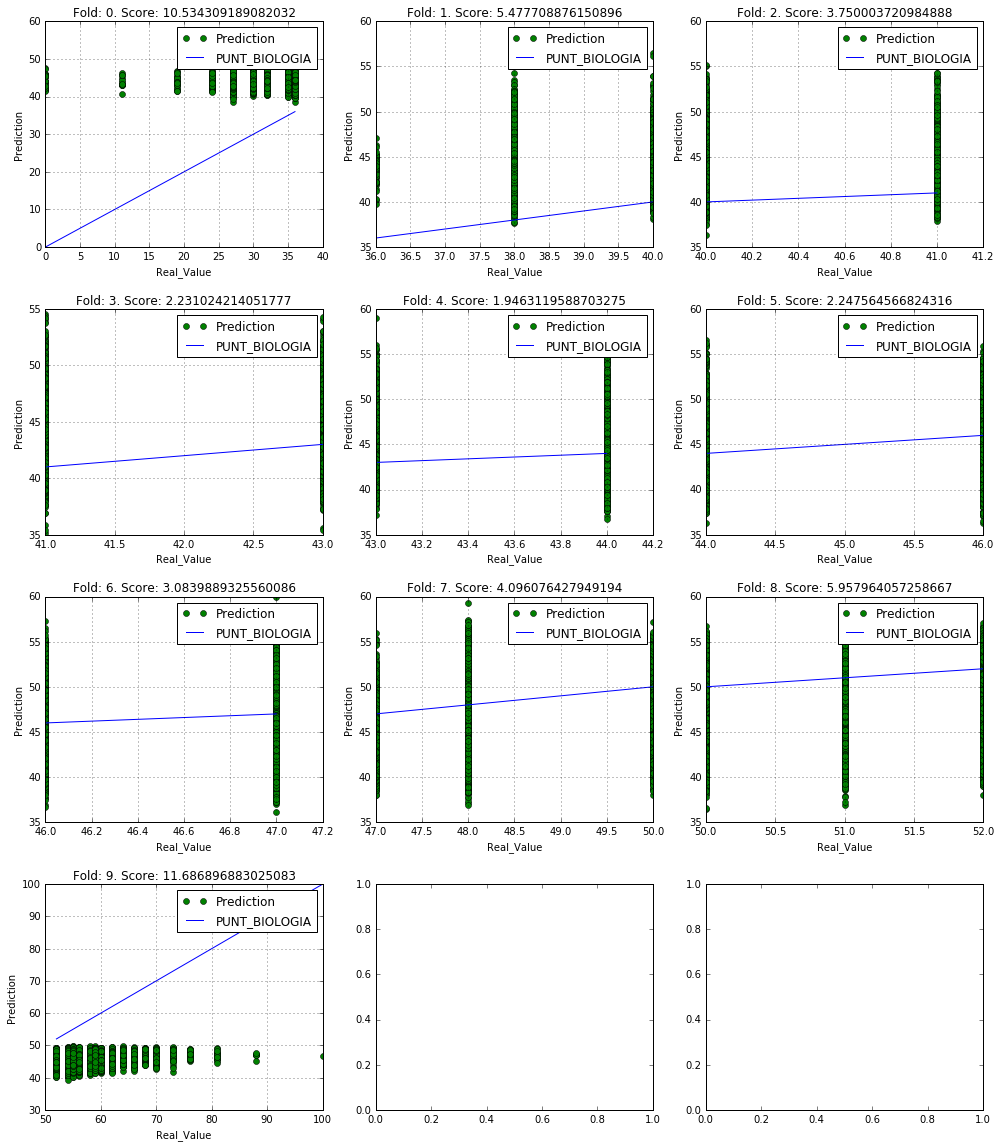

In [63]:
kf = KFold(X.shape[0], n_folds=10)
Lm = LinearRegression()
plot_predictions_KF(Lm, 'PUNT_BIOLOGIA', X, Y, kf)

#### Try with KFOLD = 5 and SHUFFLE = True

Mean Score: 4.43226003544


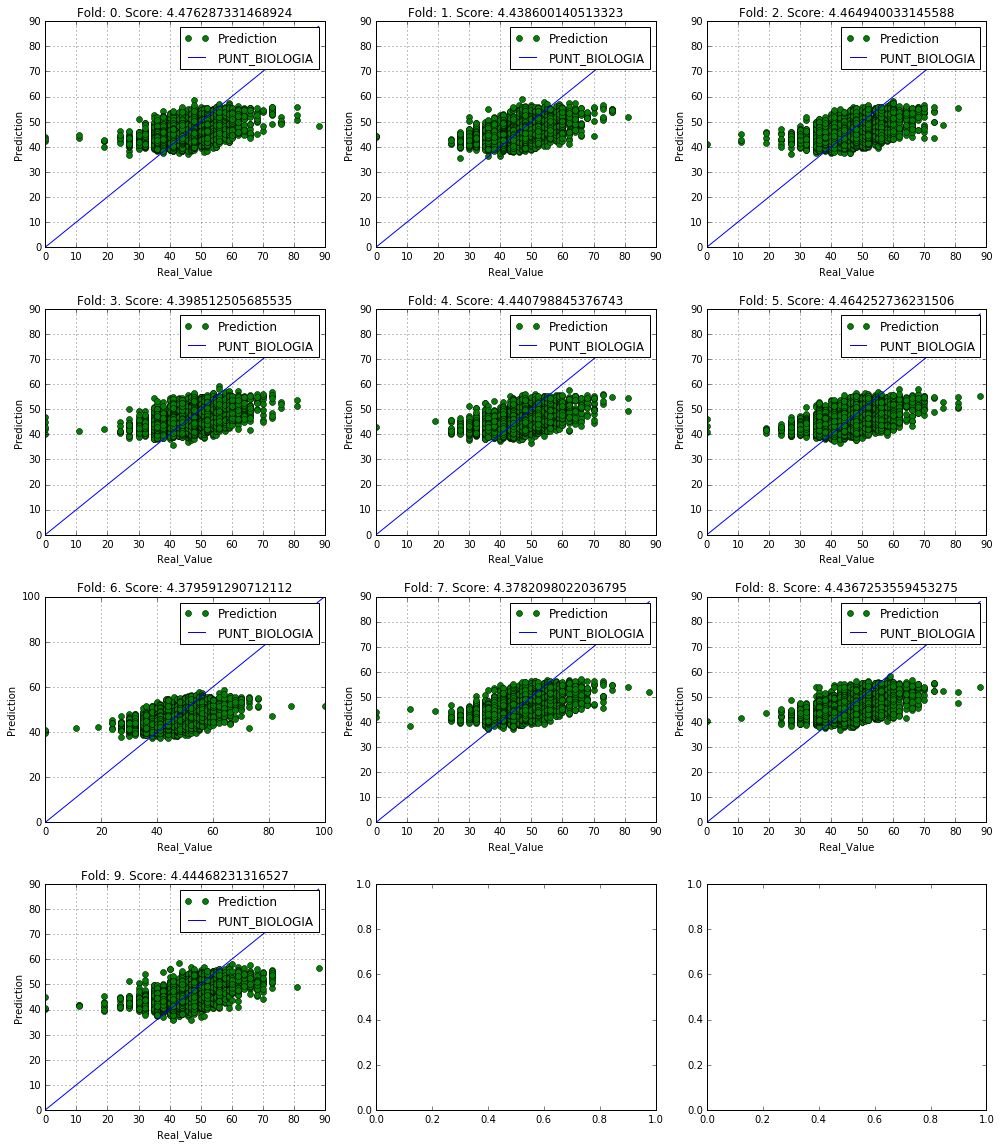

In [64]:
kf = KFold(X.shape[0], n_folds=5, shuffle=True)
Lm = LinearRegression()
plot_predictions_KF(Lm, 'PUNT_BIOLOGIA', X, Y, kf)

#### Try with ShuffleSplit = 5, Test Size = 0.2

Mean Score: 4.43728254781
takes: 3.6889004707336426 seconds


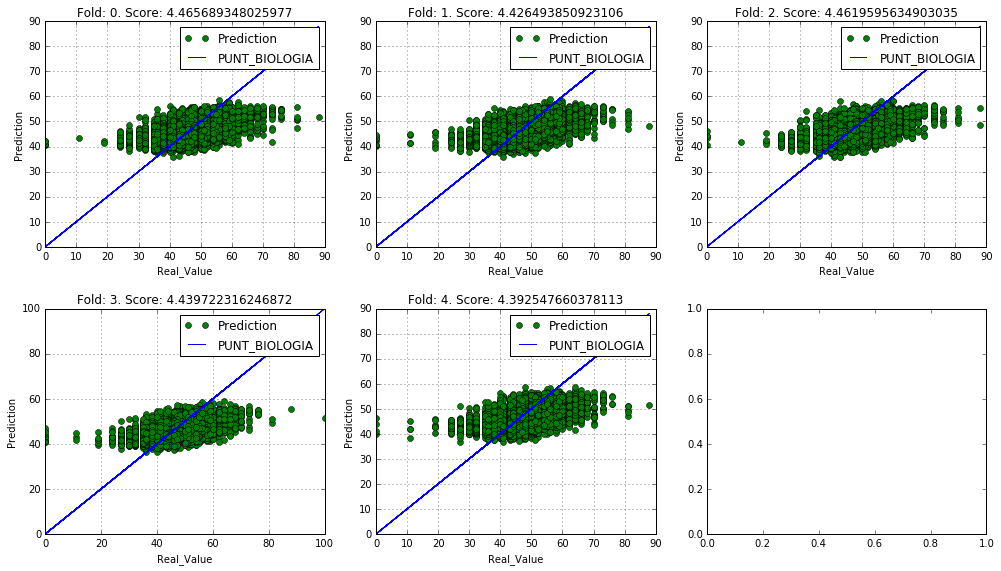

In [15]:
st = time()
rs = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2)
Lr = LinearRegression()
plot_predictions_KF(Lr, 'PUNT_BIOLOGIA', X, Y, rs)
print('takes:',time()-st, 'seconds')

## Polynomial

The Model with the Data raised to the power of 2 gives:
Mean Score: 5.83478672837


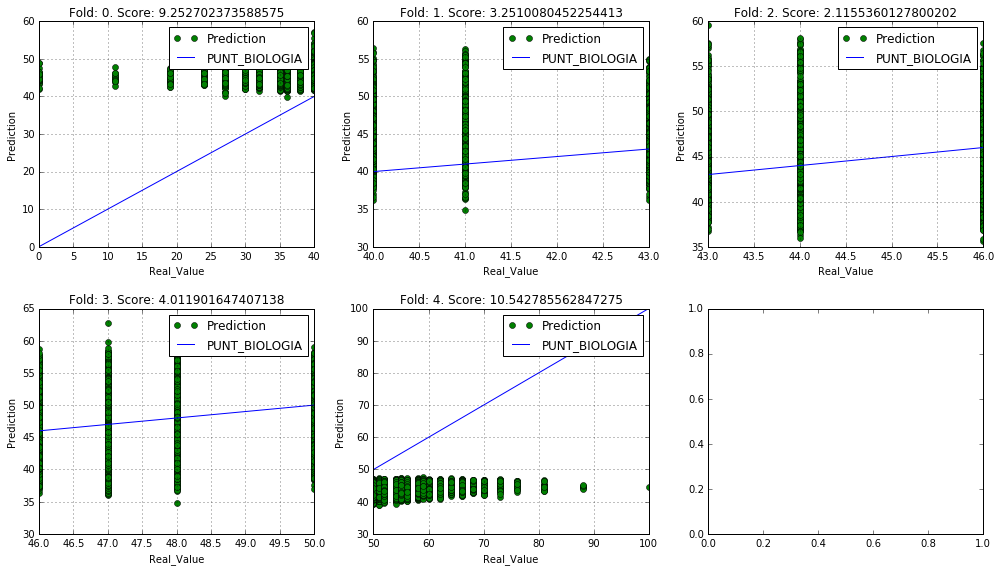

In [79]:
Lr = LinearRegression()
get_exp_prediction(Lr, 2, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the Data raised to the power of 2 gives:
Mean Score: 4.44798684126


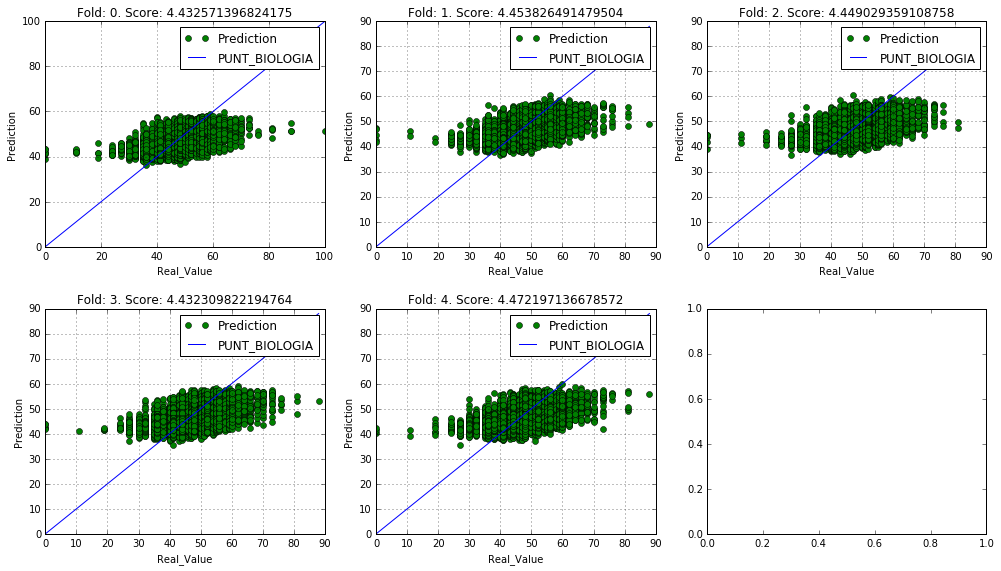

In [85]:
Lr = LinearRegression()
get_exp_prediction(Lr, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle = True)

The Model with the Data raised to the power of 2 gives:
Mean Score: 4.43939375955
takes: 2.730339288711548 seconds


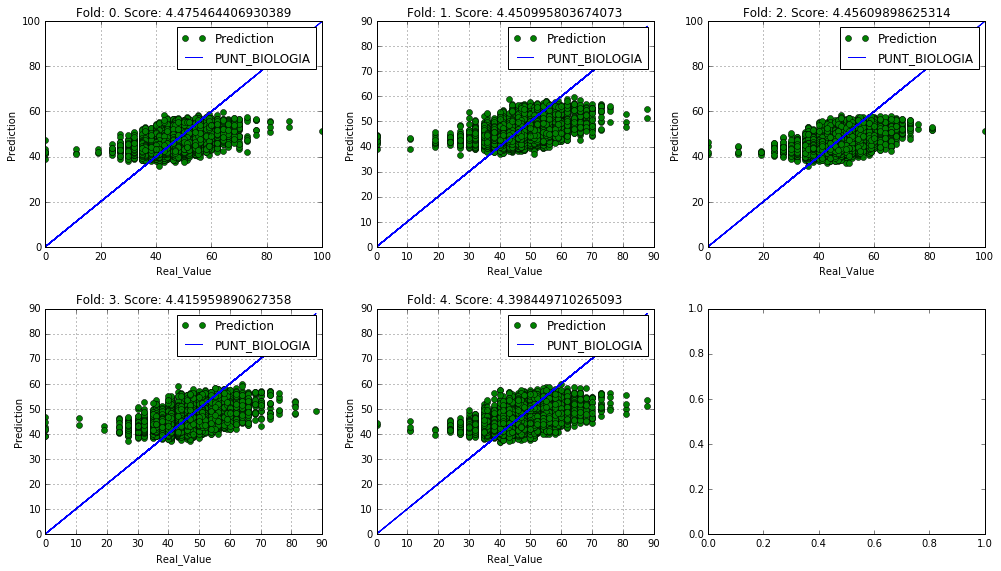

In [24]:
st=time()
Lr = LinearRegression()
get_exp_prediction(Lr, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True )
print('takes:',time()-st, 'seconds')

Now with 3

The Model with the Data raised to the power of 3 gives:
Mean Score: 5.87378055775


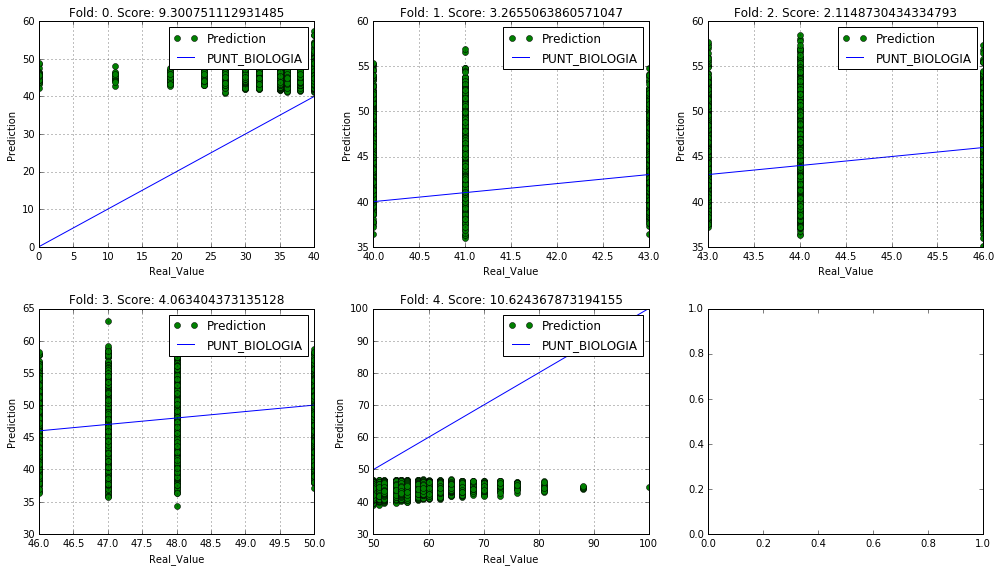

In [89]:
Lr = LinearRegression()
get_exp_prediction(Lr, 3, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the Data raised to the power of 3 gives:
Mean Score: 4.47857058232


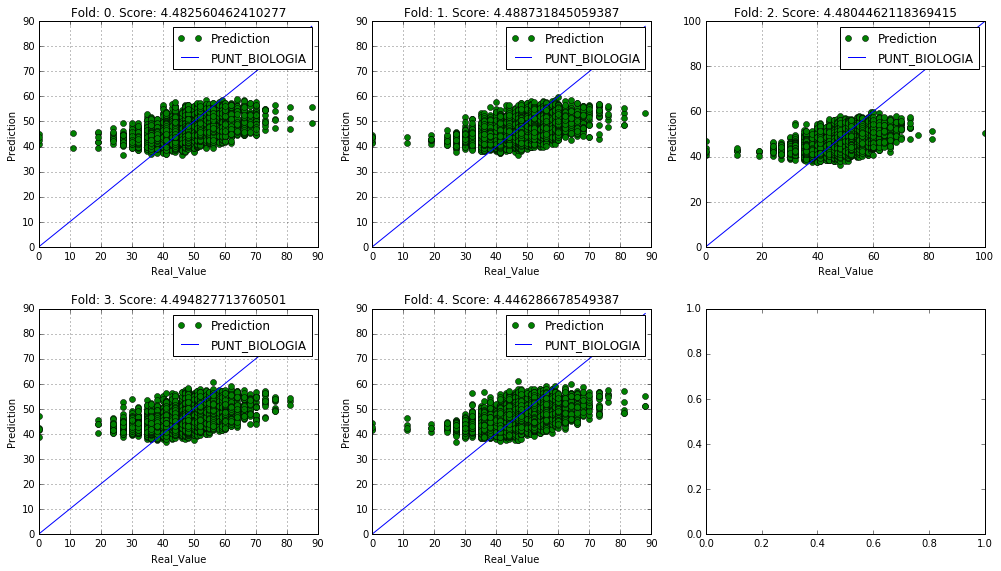

In [90]:
# Con KFolds pero shuffle: True
Lr = LinearRegression()
get_exp_prediction(Lr, 3, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle = True)

The Model with the Data raised to the power of 3 gives:
Mean Score: 4.46629571253
takes: 2.930502414703369 seconds


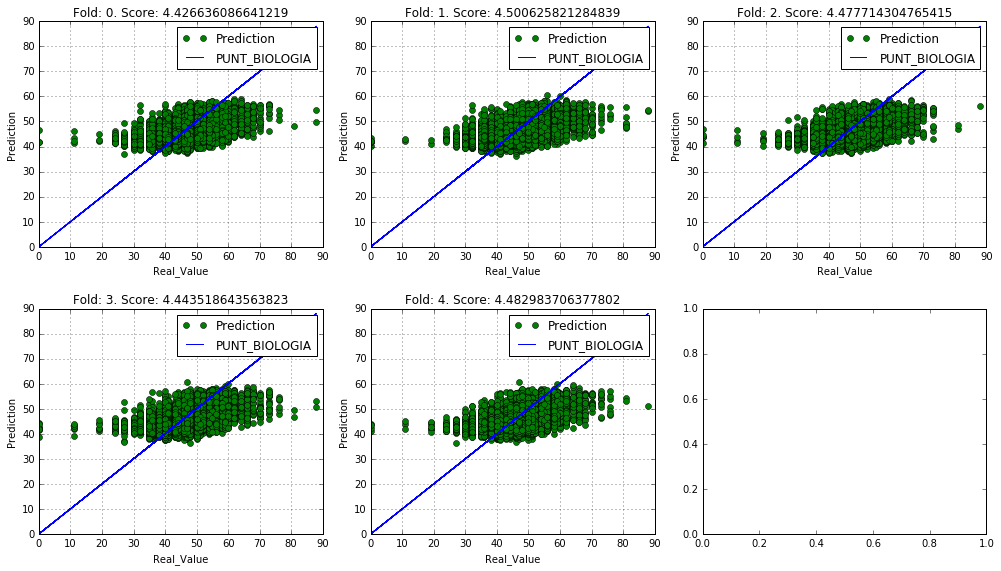

In [25]:
#Con ShuffleSplit
st = time()
Lr = LinearRegression()
get_exp_prediction(Lr, 3, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split = True)
print('takes:',time()-st, 'seconds')

### Polynomial Features
Now i will try with Polynomial Features

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 13.634885235
The prediction took: 62.64280319213867 seconds


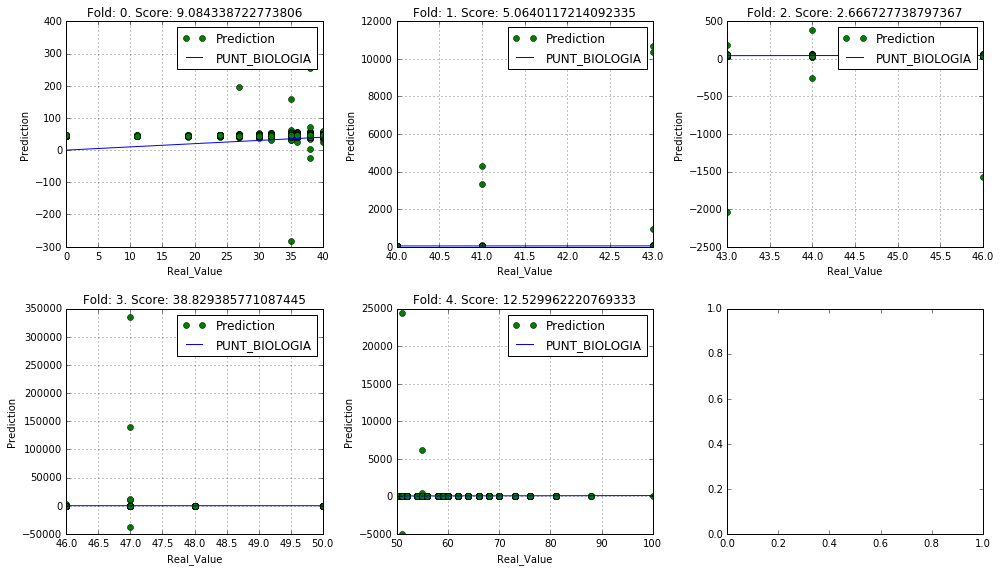

In [115]:
Lr = LinearRegression()
get_Poly_prediction(Lr, 2, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 8.30500891981
The prediction took: 62.29871416091919 seconds


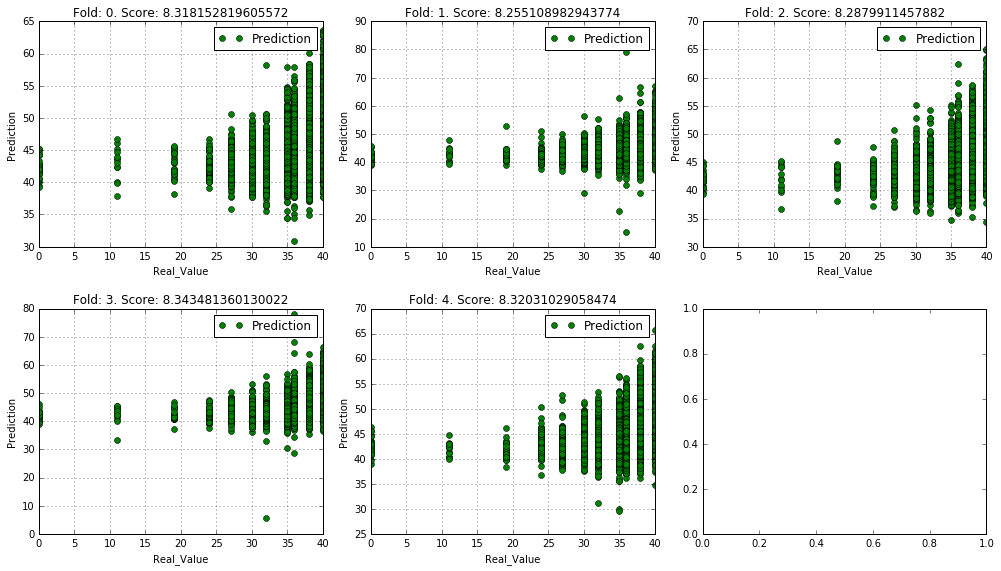

In [126]:
Lr = LinearRegression()
get_Poly_prediction(Lr, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 8.29909317252
The prediction took: 62.52335453033447 seconds


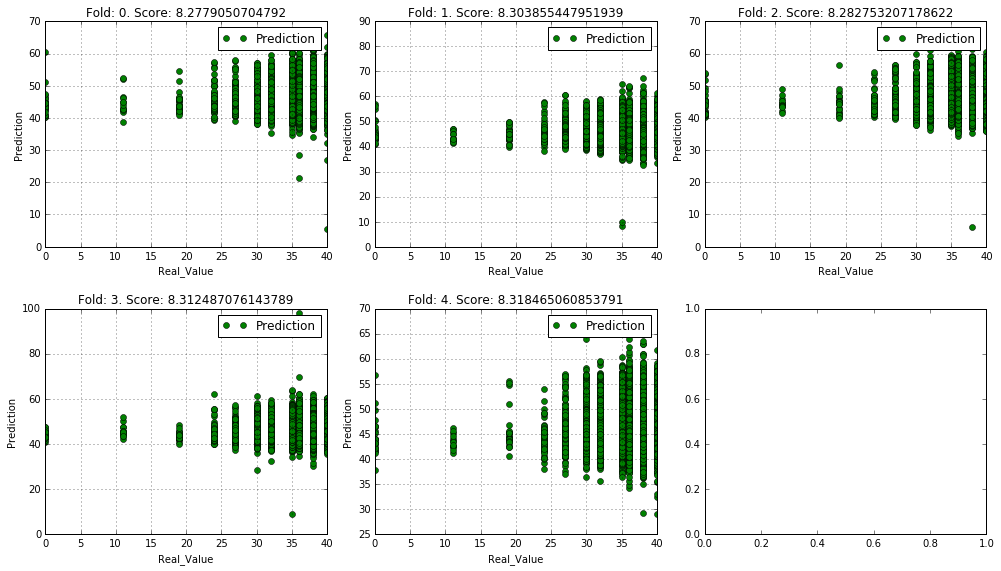

In [125]:
Lr = LinearRegression()
get_Poly_prediction(Lr, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True)

Con degree 3

The Model with the new "PolyData" with degree 3 gives:
Mean Score: 8.80831507342
The prediction took: 12926.196598529816 seconds


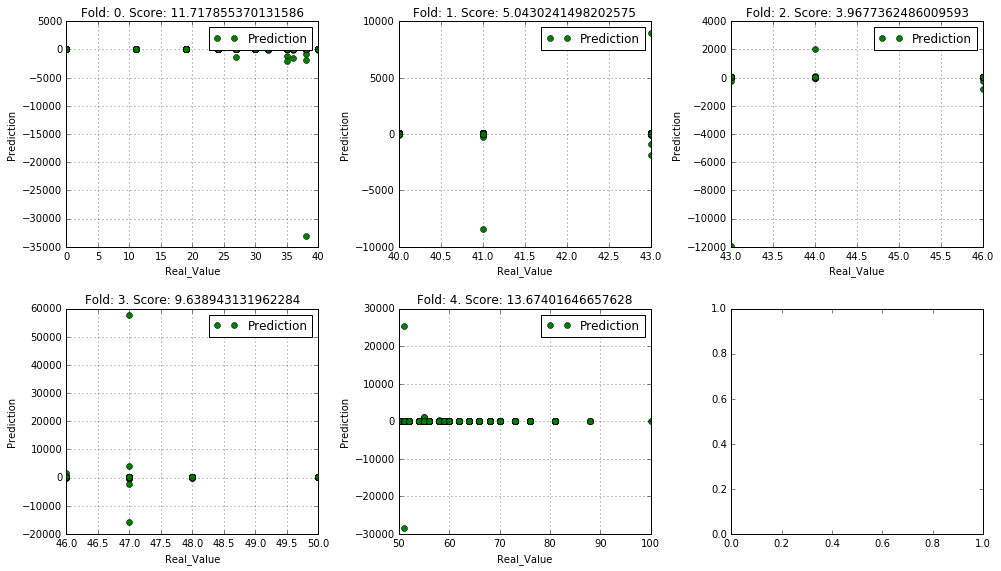

In [4]:
Lr = LinearRegression()
get_Poly_prediction(Lr, 3, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the new "PolyData" with degree 3 gives:
Mean Score: 9.35531349276
The prediction took: 11519.384715557098 seconds


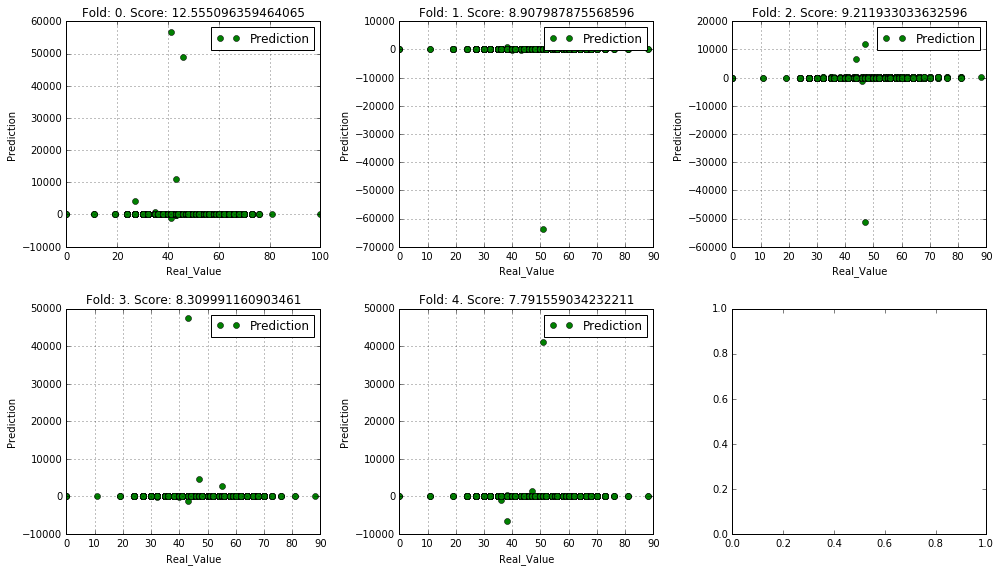

In [120]:
Lr = LinearRegression()
get_Poly_prediction(Lr, 3, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)

The Model with the new "PolyData" with degree 3 gives:
Mean Score: 8.44745602926
The prediction took: 20829.57226252556 seconds


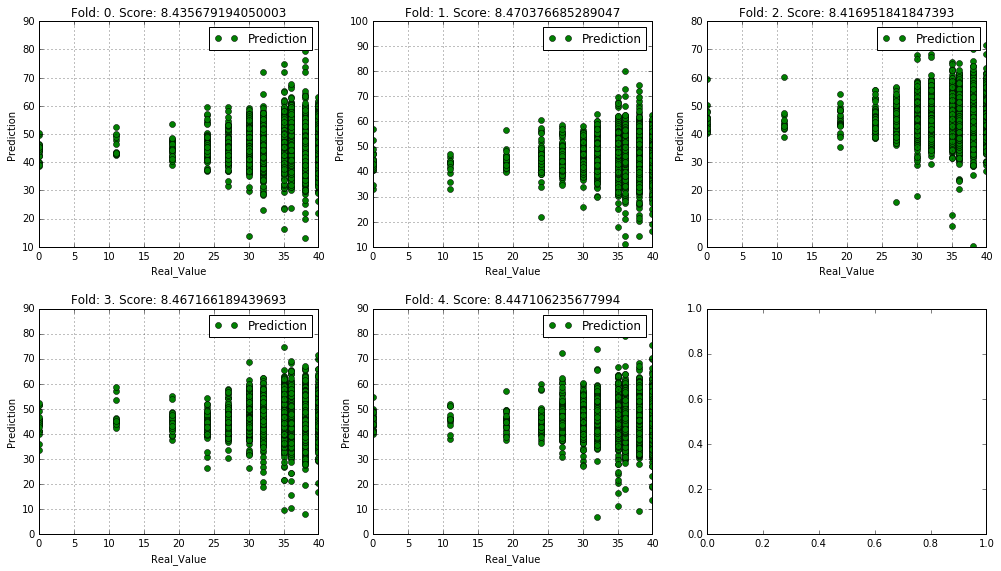

In [9]:
Lr = LinearRegression()
get_Poly_prediction(Lr, 3, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True)

# Now trying with the New list of important columns
But i will just try with the 2 best ways to predict according to the tests done before

In [26]:
New_x_list = ['ESTU_GENERO', 'ESTU_ACT_PROX_ANNO', 'COD_INTERDISCIPLINAR', 'COLE_CARACTER', 'ESTU_RESIDE_DEPTO',
              'FAMI_APORTANTES', 'FAMI_NUM_HERMANOS_EDUSUPERIOR', 'COLE_JORNADA', 'FAMI_OCUPA_MADRE', 'ESTU_CARRDESEADA_RAZON',
              'FAMI_PERSONAS_HOGAR', 'ESTU_RAZONINSTITUTO', 'FAMI_OCUPA_PADRE', 'FAMI_EDUCA_PADRE' 'FAMI_NUM_HERMANOS',
              'FAMI_EDUCA_MADRE', 'COLE_VALOR_PENSION', 'ESTU_RESIDE_MCPIO', 'ESTU_NACIMIENTO_MES',
              'ESTU_IES_COD_DESEADA', 'ESTU_NACIMIENTO_DIA', 'ESTU_NACIMIENTO_ANNO', 'ESTU_CARRDESEADA_COD',
              'COLE_COD_ICFES', 'FAMI_INGRESO_FMILIAR_MENSUAL']

y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']

S_data = data_2000.sort_values(by='PUNT_BIOLOGIA')
X = S_data.filter(items = New_x_list)
Y = S_data.filter(items = y_list)

Mean Score: 4.46551997019
takes: 2.0515377521514893 seconds


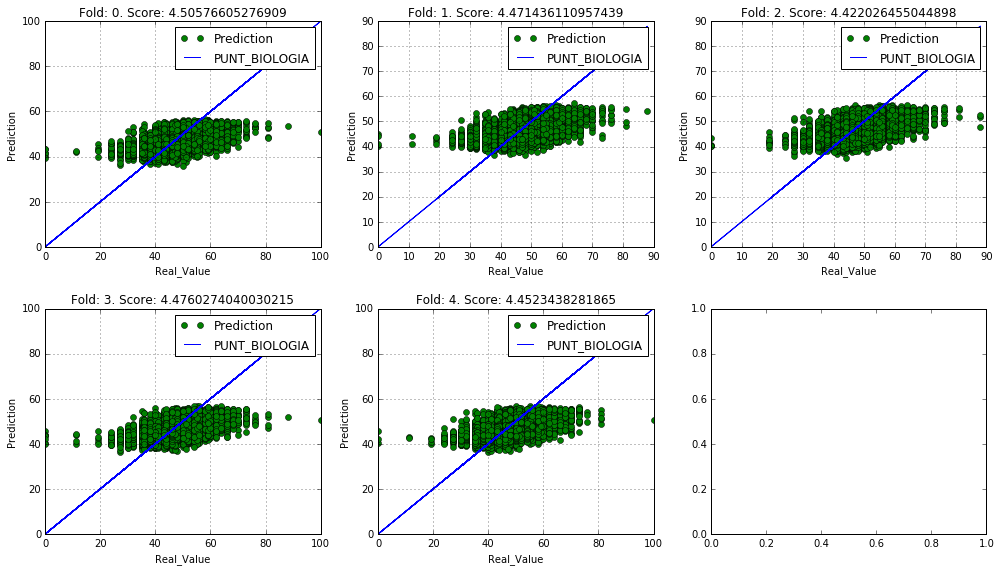

In [20]:
st = time()
rs = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2)
Lr = LinearRegression()
plot_predictions_KF(Lr, 'PUNT_BIOLOGIA', X, Y, rs)
print('takes:',time()-st, 'seconds')

The Model with the Data raised to the power of 2 gives:
Mean Score: 4.43829337899
takes: 2.5834155082702637 seconds


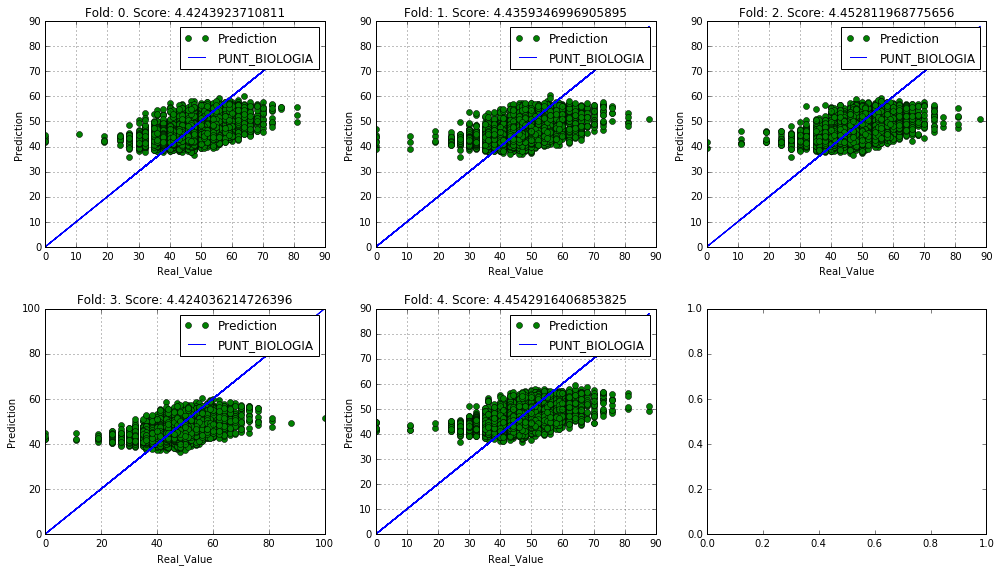

In [21]:
st = time()
Lr = LinearRegression()
get_exp_prediction(Lr, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True )
print('takes:',time()-st, 'seconds')

The Model with the Data raised to the power of 3 gives:
Mean Score: 4.48178259953
takes: 2.484320878982544 seconds


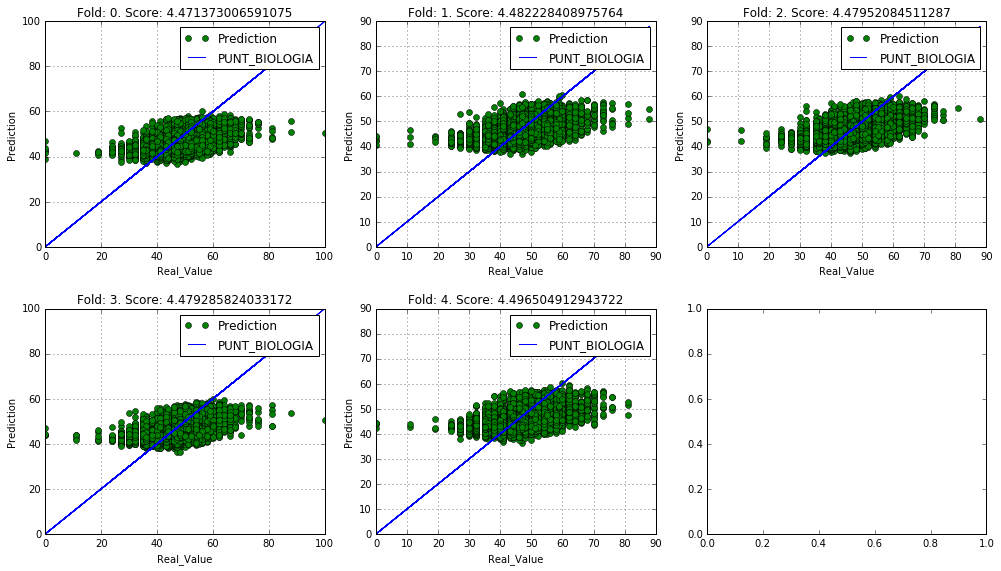

In [27]:
#Con ShuffleSplit
st = time()
Lr = LinearRegression()
get_exp_prediction(Lr, 3, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split = True)
print('takes:',time()-st, 'seconds')

# Results Obtained

|        |    1   |    2    |      3     |EXP 2 ||      |EXP 3 ||      |Poly 2||       |Poly 3 ||     | 
|--------|-------:|--------:|-----------:|---:|---:|---:|---:|---:|---:|----:|---:|---:|---:|---:|---:|
|        |Ordinary|KFShuffle|ShuffleSplit|1   |2   |3   |1   |2   |3   |1    |2   |3   |1   |2   |3   |
|Biologia|5.10    |4.43     |4.43        |5.83|4.44|4.43|5.87|4.47|4.46|13.63|8.30|8.29|8.80|9.35|8.44|

The 3 best algorithms are:  

Note: All are with ShuffleSplit  

|BEST ALGORITHMS    |Score/time[SEG] |Score/time[SEG]  |Score/time[SEG]|
|--------:          |---------------:|----------------:|--------------:|
|**Algorithm**      |Ordinary        |EXP2             |EXP3           |
|**Old Data**       |4.43 / 3.68     |4.43 / 2.73      |4.46 / 2.93    |
|**New X Data**     |4.46 / 2.05     |4.43 / 2.58      |4.48 / 2.48    |
  
Generally i can see that the score does not improve significantly, is almost the same... But in the other side, the time gets a really small improve.  

So the **CHOSEN** way to predict will be the second one, with Data powered to 2.

___

## Learning Curves

The following function (*plot_learning_curve*) was taken from the [python documentation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html) and **WILL BE ADDED** to the file of predict_functions.py

In [27]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Mean Absolute Error")
    train_sizes, train_scores, test_scores = learning_curve(estimator,
                                                            X,
                                                            y,
                                                            cv=cv,
                                                            n_jobs=n_jobs,
                                                            scoring = 'mean_absolute_error',
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(-train_scores/100, axis=1)
    train_scores_std = np.std(-train_scores/100, axis=1)
    test_scores_mean = np.mean(-test_scores/100, axis=1)
    test_scores_std = np.std(-test_scores/100, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

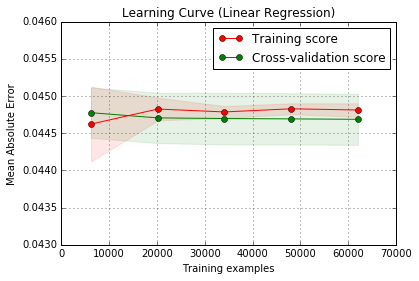

In [29]:
D_sorted = data_2000.sort_values(by='PUNT_BIOLOGIA')
New_x_list = ['ESTU_GENERO', 'ESTU_ACT_PROX_ANNO', 'COD_INTERDISCIPLINAR', 'COLE_CARACTER', 'ESTU_RESIDE_DEPTO',
              'FAMI_APORTANTES', 'FAMI_NUM_HERMANOS_EDUSUPERIOR', 'COLE_JORNADA', 'FAMI_OCUPA_MADRE', 'ESTU_CARRDESEADA_RAZON',
              'FAMI_PERSONAS_HOGAR', 'ESTU_RAZONINSTITUTO', 'FAMI_OCUPA_PADRE', 'FAMI_EDUCA_PADRE' 'FAMI_NUM_HERMANOS',
              'FAMI_EDUCA_MADRE', 'COLE_VALOR_PENSION', 'ESTU_RESIDE_MCPIO', 'ESTU_NACIMIENTO_MES',
              'ESTU_IES_COD_DESEADA', 'ESTU_NACIMIENTO_DIA', 'ESTU_NACIMIENTO_ANNO', 'ESTU_CARRDESEADA_COD',
              'COLE_COD_ICFES', 'FAMI_INGRESO_FMILIAR_MENSUAL']

y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
              'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']

New_X = D_sorted.filter(items = New_x_list)
New_2X = New_X**2
Y_train = D_sorted.filter(items = y_list)

title = "Learning Curve (Linear Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n = New_2X.shape[0], n_iter=5, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, New_2X, Y_train['PUNT_BIOLOGIA'], ylim=(0.043, 0.046), cv=cv, n_jobs=4)

# Conclusion

The **CHOSEN** way to predict:

* Linear Regression + New Data powered to 2 + ShuffleSplit

Last Score Obtained: 

|Score[MAE]|Time[s]|
|---------:|------:|
|4.43      |2.58   |

Metric used: 

* For the Score was used the **Mean Absolute Error (MAE)** 
* For the time was used the **seconds unit (s)**